MNIST database of Handwritten digits.

In [1]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.12.0'

In [2]:
#intialize random number generator
import random
random.seed(0)


#Ignore warnings

import warnings
warnings.filterwarnings("ignore")

Import Dataset

In [3]:
(X_train,Y_train), (X_test,Y_test) = tensorflow.keras.datasets.mnist.load_data()

Printing Shape of datasets

In [4]:
print(Y_train.shape)
print('First 5 examples :', Y_train[0:5])

(60000,)
First 5 examples : [5 0 4 1 9]


Visualize using matplotlib

Label : 0


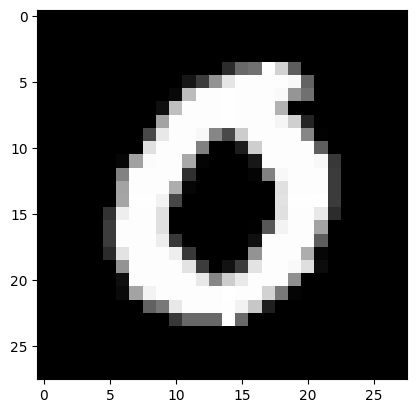

In [5]:
import matplotlib.pyplot as plt

%matplotlib inline

print("Label : {}".format(Y_train[8000]))
plt.imshow(X_train[8000], cmap = 'gray')

Label : 6


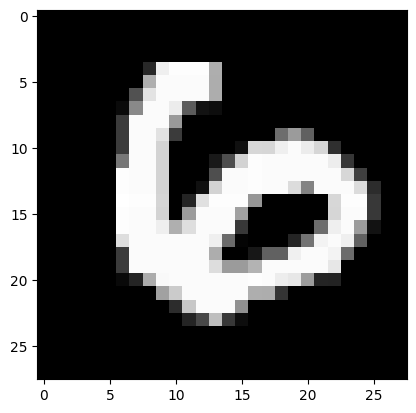

In [6]:
print("Label : {}".format(Y_train[9000]))
plt.imshow(X_train[9000], cmap = 'gray')

In [7]:
#printing shape of data

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


One hot encode the class vector

convert class vectors (integers) to binary class matrix,


convert y_train and y_test,
number of classes: 10,

we are doing this to use categorical_crossentropy as loss




In [8]:
from tensorflow.keras.utils import to_categorical

print("Value before encoding :", Y_train[0])

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test , num_classes = 10)

print("Shape of Y_train : ", Y_train.shape)
print("One hot encoding value of y_train :",Y_train[0])

Value before encoding : 5
Shape of Y_train :  (60000, 10)
One hot encoding value of y_train : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
#Initialize the Sequential model

model = tensorflow.keras.models.Sequential()

#Reshape data from 2d to 1d) --> 28x28 to 784


model.add(tensorflow.keras.layers.Reshape((784,), input_shape=(28,28)))

#Normalize the data

model.add(tensorflow.keras.layers.BatchNormalization())

In [10]:
#apply activation function

#HIdden layer

model.add(tensorflow.keras.layers.Dense(200, activation= 'relu', name = 'Layer_1'))
model.add(tensorflow.keras.layers.Dense(100, activation= 'relu' , name = 'Layer2'))

#Dropout LAyer

model.add(tensorflow.keras.layers.Dropout(0.5))

#Hidden Layer

model.add(tensorflow.keras.layers.Dense(60,activation= "relu", name = "Layer_3"))

model.add(tensorflow.keras.layers.Dense(30,activation= "relu", name = "Layer_4"))

#Dropout Layer

model.add(tensorflow.keras.layers.Dropout(0.3))



In [11]:
#output layer

model.add(tensorflow.keras.layers.Dense(10,activation="softmax", name = "Output_layer"))


In [14]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 784)               0         
                                                                 
 batch_normalization (BatchN  (None, 784)              3136      
 ormalization)                                                   
                                                                 
 Layer_1 (Dense)             (None, 200)               157000    
                                                                 
 Layer2 (Dense)              (None, 100)               20100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 Layer_3 (Dense)             (None, 60)                6060      
                                                        

In [16]:
model.fit(X_train,Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 32)

Epoch 1/30
1875/1875 [==============================] - 18s 8ms/step - loss: 0.5349 - accuracy: 0.8453 - val_loss: 0.2481 - val_accuracy: 0.9501
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2587 - accuracy: 0.9344 - val_loss: 0.1802 - val_accuracy: 0.9622
Epoch 3/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1975 - accuracy: 0.9502 - val_loss: 0.1819 - val_accuracy: 0.9668
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 0.1648 - accuracy: 0.9584 - val_loss: 0.2937 - val_accuracy: 0.9654
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1421 - accuracy: 0.9637 - val_loss: 0.2333 - val_accuracy: 0.9694
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1239 - accuracy: 0.9686 - val_loss: 0.1829 - val_accuracy: 0.9734
Epoch 7/30
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1119 - accuracy: 0.9720 - val_loss: 0.2118 - val_ac

In [17]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.2512 - accuracy: 0.9725


[0.2512458860874176, 0.9725000262260437]